In [1]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset
data_ipl=pd.read_csv(r'C:\Users\Datasets\Sports Analytics\deliveries.csv')
data_ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Problem Statement:Perform In-Depth Analysis of any batsman performance

In [3]:
#Batsman is Shikhar Dhawan
# We have to filter out data with respect to Shikhar Dhawan
data_filter=data_ipl['batsman']=='S Dhawan'
data_SD=data_ipl[data_filter]
data_SD.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,1,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,5,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Analyzing different dismissal kind of Shikhar Dhawan

In [ ]:
# Analyzing different dismissal kind of Shikhar Dhawan
data_SD['dismissal_kind'].value_counts()

<AxesSubplot:>

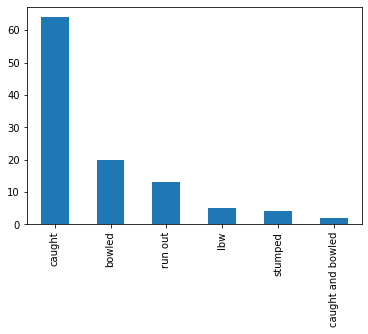

In [5]:
data_SD['dismissal_kind'].value_counts().plot.bar()

In [6]:
# Inference:Shikhar Dhawan got dismissed maximum times by 'caught' in IPL  

In [7]:
# Total Runs scored by Shikhar Dhawan in his IPL Career:
data_SD['batsman_runs'].sum()

3561

In [8]:
# Total No of 6s:
NO_OF_SIXES=len(data_SD[data_SD['batsman_runs']==6])
NO_OF_SIXES

71

In [9]:
# Total no of 4s:
NO_OF_FOURS=len(data_SD[data_SD['batsman_runs']==4])
NO_OF_FOURS

401

In [10]:
# Overall Run Distribution of Shikhar Dhawan:
Runs_Sixes=NO_OF_SIXES*6
print(Runs_Sixes)
Runs_Four=NO_OF_FOURS*4
print(Runs_Four)
Runs_one=len(data_SD[data_SD['batsman_runs']==1])
print(Runs_one)
Runs_two=len(data_SD[data_SD['batsman_runs']==2])*2
print(Runs_two)
Runs_three=len(data_SD[data_SD['batsman_runs']==3])*3
print(Runs_three)

426
1604
1137
336
48


([<matplotlib.patches.Wedge at 0x1098f8f8>,
 [Text(0.5888506039671512, 0.9291151522860455, '1'),
  Text(-0.7403245990497188, 0.8135843459911659, '2'),
  Text(-0.9691224655656656, 0.5203860554779743, '3'),
  Text(-0.6229598959809503, -0.906598570481668, '4'),
  Text(1.0227971704058867, -0.40482829472470405, '6')])

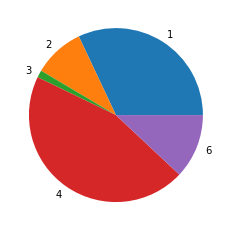

In [11]:
slices=[1137,336,48,1604,426]
labels=[1,2,3,4,6]
plt.pie(slices,labels=labels)

# Score Distribution For Teams by Innings:

In [12]:
# Total runs scored by each team in each match in first innings:
runs_dist=data_ipl.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
print(runs_dist)

      match_id  inning                 batting_team  total_runs
0            1       1          Sunrisers Hyderabad         207
1            1       2  Royal Challengers Bangalore         172
2            2       1               Mumbai Indians         184
3            2       2       Rising Pune Supergiant         187
4            3       1                Gujarat Lions         183
...        ...     ...                          ...         ...
1279       634       2        Kolkata Knight Riders         140
1280       635       1                Gujarat Lions         162
1281       635       2          Sunrisers Hyderabad         163
1282       636       1          Sunrisers Hyderabad         208
1283       636       2  Royal Challengers Bangalore         200

[1284 rows x 4 columns]


<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

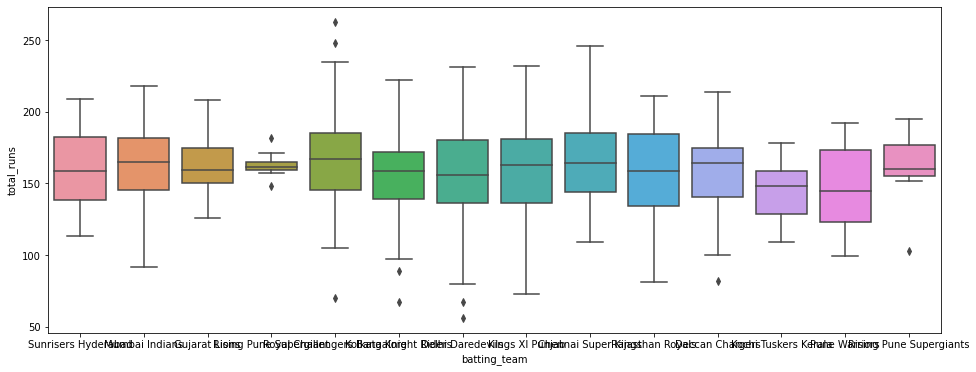

In [13]:
# Most runs scored by which team:
runs_1=runs_dist[runs_dist['inning']==1]
plt.figure(figsize=(16,6))
sns.boxplot(x='batting_team',y='total_runs',data=runs_1)

# How many times teams have scored runs more than 200:

In [14]:
max_runs=data_ipl.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

In [15]:
count_200=max_runs[max_runs['total_runs']>200]
print(count_200)

      match_id  inning                 batting_team  total_runs
0            1       1          Sunrisers Hyderabad         207
16           9       1             Delhi Daredevils         205
38          20       1  Royal Challengers Bangalore         213
62          32       1          Sunrisers Hyderabad         207
72          36       1          Sunrisers Hyderabad         209
...        ...     ...                          ...         ...
1170       580       1  Royal Challengers Bangalore         227
1250       620       1  Royal Challengers Bangalore         248
1256       623       1               Mumbai Indians         206
1262       626       1  Royal Challengers Bangalore         211
1282       636       1          Sunrisers Hyderabad         208

[62 rows x 4 columns]


c:\users\mohammad\python_32\python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

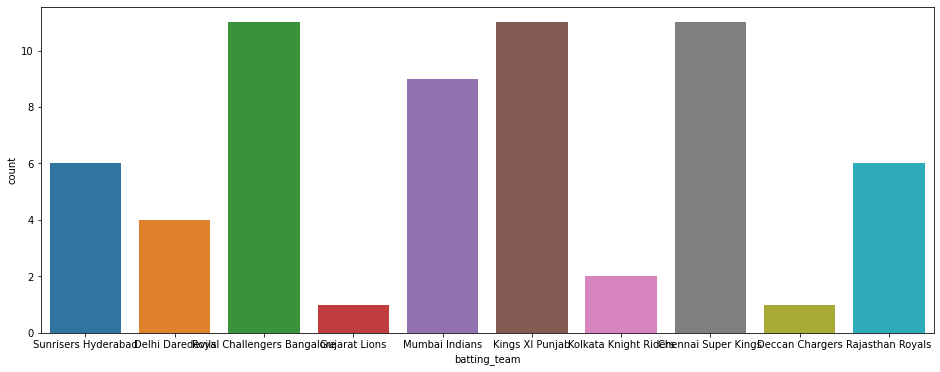

In [16]:
# Count plot:
plt.figure(figsize=(16,6))
sns.countplot(count_200['batting_team'])

# Batsman Performance Analysis:

In [17]:
# runs scored by each batsman:
data_ipl.groupby(['batsman'])['total_runs'].sum().reset_index()

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Flintoff,72
...,...,...
456,YV Takawale,207
457,Yashpal Singh,49
458,Younis Khan,3
459,Yuvraj Singh,2710


In [18]:
# top 10 batsman with most number of sixes:
batsman=data_ipl.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [19]:
sixes=data_ipl[data_ipl['batsman_runs']==6]
sixes

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [20]:
No_6=sixes.groupby(['batsman'])['batsman_runs'].count().reset_index()
No_6.sort_values("batsman_runs",ascending=False).head(10)

,batsman,batsman_runs
55,CH Gayle,266
246,SK Raina,174
216,RG Sharma,173
284,V Kohli,160
65,DA Warner,160
11,AB de Villiers,158
175,MS Dhoni,156
297,YK Pathan,149
124,KA Pollard,148
299,Yuvraj Singh,141


In [21]:
# top 10 players with most number of fours:
fours=data_ipl[data_ipl['batsman_runs']==4]
fours

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
No_4=fours.groupby(['batsman'])['batsman_runs'].count().reset_index()
No_4.sort_values("batsman_runs",ascending=False).head(10)

,batsman,batsman_runs
112,G Gambhir,484
303,SK Raina,402
83,DA Warner,401
285,S Dhawan,401
346,V Kohli,384
280,RV Uthappa,377
265,RG Sharma,354
347,V Sehwag,334
34,AM Rahane,320
72,CH Gayle,297


In [30]:
# Top 10 players with most strike rate:

balls_played=data_ipl.groupby(['batsman'])['ball'].count().reset_index()
balls_played

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [25]:
strike_rate=pd.concat([batsman,balls_played.iloc[:,1]],axis=1)
strike_rate

,batsman,batsman_runs,ball
0,A Ashish Reddy,280,196
1,A Chandila,4,7
2,A Chopra,53,75
3,A Choudhary,25,20
4,A Flintoff,62,57
...,...,...,...
456,YV Takawale,192,183
457,Yashpal Singh,47,67
458,Younis Khan,3,7
459,Yuvraj Singh,2591,2050


In [29]:
strike_rate['Strike_Rate']=strike_rate['batsman_runs']/strike_rate['ball']*100
strike_rate.sort_values("Strike_Rate",ascending=False).head(10)

,batsman,batsman_runs,ball,Strike_Rate
117,DL Chahar,14,6,233.333333
430,Umar Gul,39,19,205.263158
337,RS Sodhi,4,2,200.000000
69,BCJ Cutting,124,70,177.142857
35,AJ Tye,53,30,176.666667
402,Shahid Afridi,81,46,176.086957
154,I Malhotra,7,4,175.000000
382,SN Khan,177,103,171.844660
95,CR Brathwaite,95,56,169.642857
218,LJ Wright,106,63,168.253968


In [34]:
# Top 10 batsman with most number of runs in a particular match.  

most_runs=data_ipl.groupby(['match_id','batting_team','batsman'])['batsman_runs'].sum().reset_index()
most_runs.sort_values("batsman_runs",ascending=False).head(10)

,match_id,batting_team,batsman,batsman_runs
6207,411,Royal Challengers Bangalore,CH Gayle,175
898,60,Kolkata Knight Riders,BB McCullum,158
8435,562,Royal Challengers Bangalore,AB de Villiers,133
9268,620,Royal Challengers Bangalore,AB de Villiers,129
5594,372,Royal Challengers Bangalore,CH Gayle,128
3132,206,Chennai Super Kings,M Vijay,127
535,36,Sunrisers Hyderabad,DA Warner,126
7752,516,Kings XI Punjab,V Sehwag,122
3689,243,Kings XI Punjab,PC Valthaty,120
4223,279,Delhi Daredevils,V Sehwag,119


In [42]:
# Top 10 highest runs scorer of all time:
highest_scorer=data_ipl.groupby(['batsman'])['batsman_runs'].sum().reset_index

In [44]:
highest_scorer.sort_values("batsman_runs",ascending=False)

AttributeError: 'function' object has no attribute 'sort_values'

<AxesSubplot:>

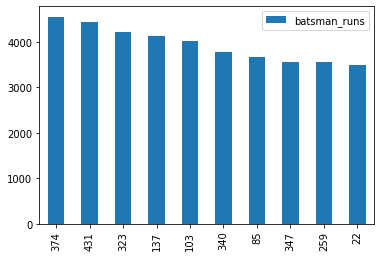

In [37]:
highest_scorer.sort_values("batsman_runs",ascending=False).head(10).plot(kind="bar")

# Highest Wickets Takers:

In [47]:
data_ipl['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [48]:
dismissal_kind=["caught","bowled","run out","lbw","stumped","caught and bowled","hit wicket"]
wickets=data_ipl[data_ipl["dismissal_kind"].isin(dismissal_kind)]
wickets.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [50]:
wickets["bowler"].value_counts()[:10]

SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
R Vinay Kumar      125
A Nehra            121
Z Khan             118
B Kumar            117
R Ashwin           110
Name: bowler, dtype: int64

<AxesSubplot:>

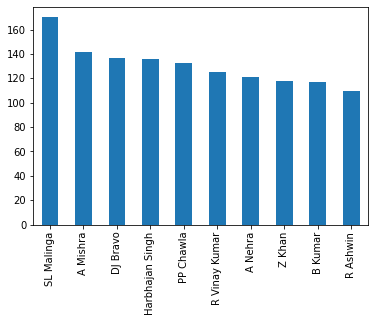

In [51]:
wickets["bowler"].value_counts()[:10].plot(kind="bar")